# Group 1 - Final Project - Neural Network

### Sihe Zheng, szheng12@depaul.edu
### YunTzu Yu, yyu54@depaul.edu
### Saruul Enkhtur, senkhtur@depaul.edu
### Lukasz Grzybek, lgrzybek@depaul.edu


#### DePaul University, College of Computing and Digital Media,
#### DSC 672 DATA SCIENCE CAPSTONE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten, Conv1D, MaxPooling1D, Dropout, GRU, SimpleRNN
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import gc
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import LSTM
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

## Function Reduce Memory Usage

In [ ]:
# Reduce Memory Usage
# reference : https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65 @ARJANGROEN

def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage became: ",mem_usg," MB")

    return df

## Load and Data Preprosses

In [ ]:
defog = pd.read_csv('/content/drive/MyDrive/DSC672/finaldataset/full_defog.csv')

In [ ]:
defog = reduce_memory_usage(defog)

Memory usage of dataframe is 374.50 MB
Memory usage became:  74.1197566986084  MB


In [ ]:
defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Medication,Age,Sex,YearsSinceDx,NFOGQ
0,1000,-0.953613,0.023209,-0.397949,0,0,0,0,61,0,7.0,22
1,1001,-0.963867,0.024414,-0.398438,0,0,0,0,61,0,7.0,22
2,1002,-0.968262,0.028320,-0.387939,0,0,0,0,61,0,7.0,22
3,1003,-0.965332,0.028351,-0.371582,0,0,0,0,61,0,7.0,22
4,1004,-0.954590,0.029755,-0.362061,0,0,0,0,61,0,7.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
4090525,122967,-0.936035,-0.098633,-0.055573,0,0,0,0,72,0,14.0,15
4090526,122968,-0.941406,-0.122864,-0.083069,0,0,0,0,72,0,14.0,15
4090527,122969,-0.940918,-0.134033,-0.107422,0,0,0,0,72,0,14.0,15
4090528,122970,-0.945312,-0.130981,-0.117310,0,0,0,0,72,0,14.0,15


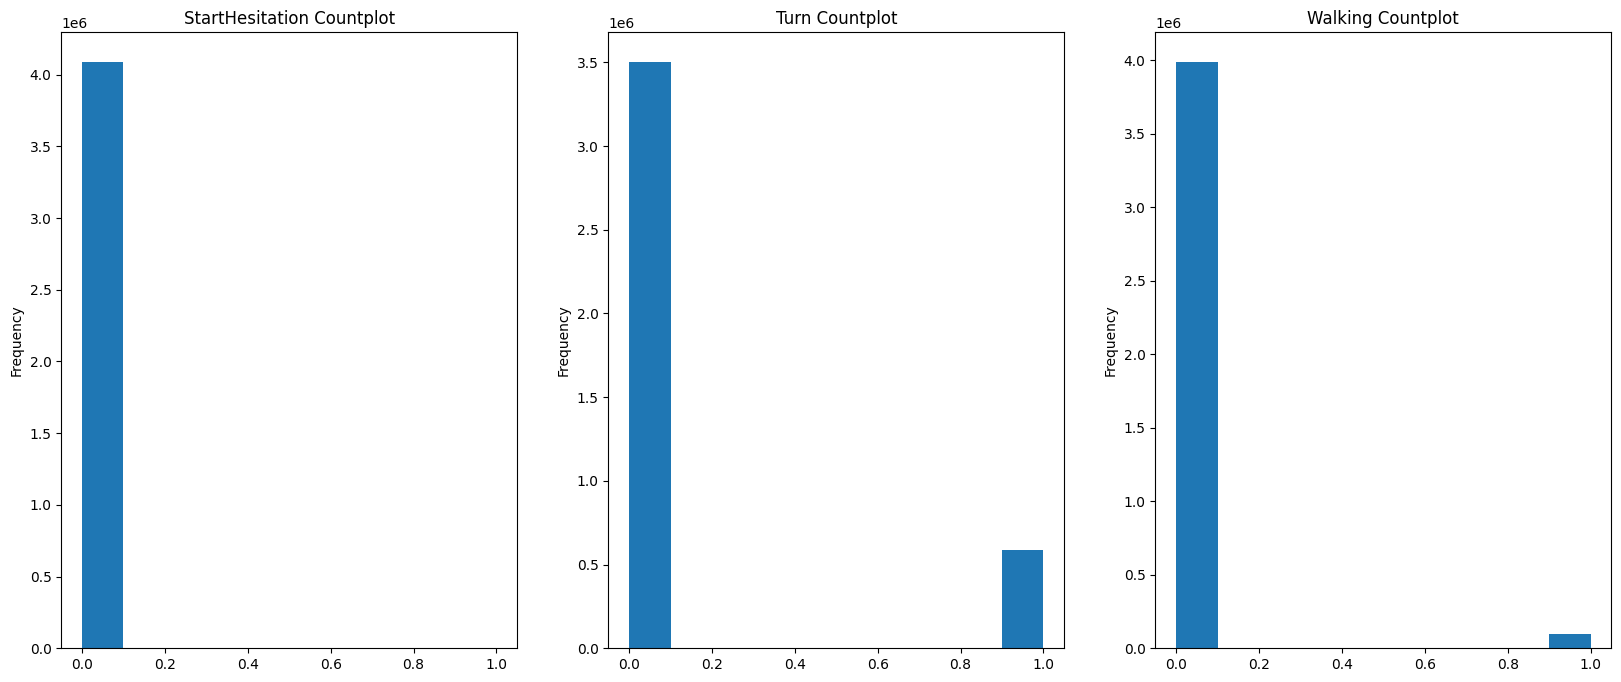

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
defog[['StartHesitation', 'Turn', 'Walking']].StartHesitation.plot(kind='hist', ax=ax[0], title = 'StartHesitation Countplot')
defog[['StartHesitation', 'Turn', 'Walking']].Turn.plot(kind='hist', ax = ax[1], title = 'Turn Countplot')
defog[['StartHesitation', 'Turn', 'Walking']].Walking.plot(kind='hist', ax = ax[2], title = 'Walking Countplot')
plt.show()

In [ ]:
def Visualization(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [ ]:
def preprocess_data(data):
    # Extract features and target variables
    X = data[['AccV', 'AccML', 'AccAP']].values
    y = data[['StartHesitation', 'Turn', 'Walking']].values

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape features for LSTM
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Convert target variables to integers
    y = np.argmax(y, axis=1)

    # Split data into training and testing sets
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

    return trainX, trainy, testX, testy


In [ ]:
trainX, trainy, testX, testy = preprocess_data(defog)

In [ ]:
# One-hot encode y
trainy_encoded = to_categorical(trainy)
testy_encoded = to_categorical(testy)

# Verify the shape of one-hot encoded labels
print("Shape of trainy_encoded:", trainy_encoded.shape)
print("Shape of testy_encoded:", testy_encoded.shape)

Shape of trainy_encoded: (3272424, 3)
Shape of testy_encoded: (818106, 3)


In [ ]:
trainy = trainy_encoded.reshape((trainy_encoded.shape[0], 1, trainy_encoded.shape[1]))
testy = testy_encoded.reshape((testy_encoded.shape[0], 1, testy_encoded.shape[1]))

In [ ]:
print('X_train Shape:',trainX.shape)
print('X_test Shape:',testX.shape)
print('y_train Shape:',trainy.shape)
print('y_test Shape:',testy.shape)

X_train Shape: (3272424, 1, 3)
X_test Shape: (818106, 1, 3)
y_train Shape: (3272424, 1, 3)
y_test Shape: (818106, 1, 3)


In [ ]:
input_shape = trainX.shape[1:]
input_shape

(1, 3)

In [ ]:
# create a normalization layer and set its internal state using training set
normalizer= keras.layers.experimental.preprocessing.Normalization()
# to compute and store the mean/stdev of each feature
normalizer.adapt(trainX)

## Models

### LSTM model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 normalization_1 (Normalizat  (None, 1, 3)             7         
 ion)                                                            
                                                                 
 lstm (LSTM)                 (None, 1, 64)             17408     
                                                                 
 dense (Dense)               (None, 1, 3)              195       
                                                                 
Total params: 17,610
Trainable params: 17,603
Non-trainable params: 7
_________________________________________________________________
Epoch 1/10
51132/51132 [==============================] - 162s 3ms/step - loss: 0.1107 - accuracy: 0.8317 - precision: 0.83

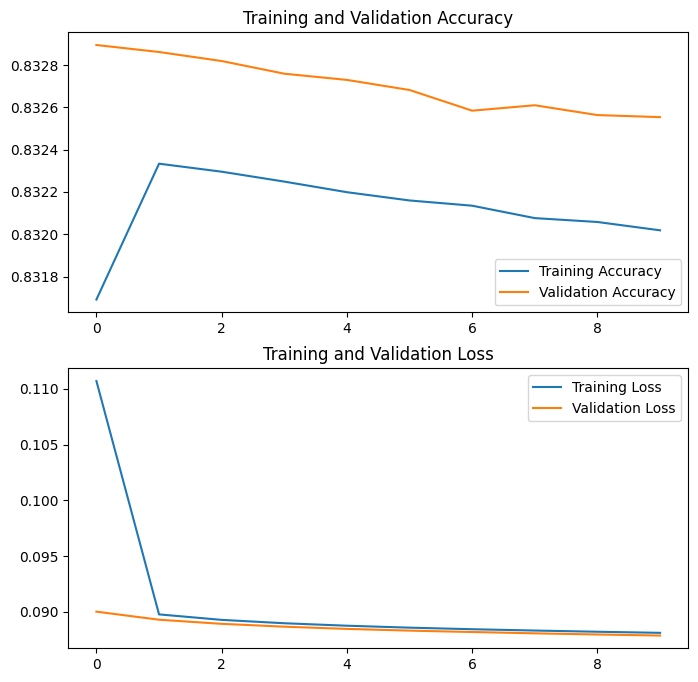

In [ ]:
# defne the input layer with shape (1, 3)-input_shape
inputs = keras.layers.Input(shape=input_shape)

# assiged normalization layer as x, receives the input
x=normalizer(inputs)

#layer
x=keras.layers.LSTM(64,return_sequences=True,activation='relu')(x)

outputs=keras.layers.Dense(3, activation='softmax')(x)

model_LSTM=keras.Model(inputs, outputs)
model_LSTM.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                   loss='mse',
                   metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_LSTM.summary()

callback = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

history = model_LSTM.fit(trainX, trainy, validation_data=(testX, testy),epochs=10, batch_size=64, verbose=1, callbacks=[callback])

Visualization(history)


In [ ]:
# Evaluate the model on the training data
model_LSTM.evaluate(trainX, trainy)

102264/102264 [==============================] - 201s 2ms/step - loss: 0.0881 - accuracy: 0.8320 - precision: 0.8321 - recall: 0.8318


[0.08807812631130219,
 0.832033097743988,
 0.8321433067321777,
 0.8318445086479187]

In [ ]:
# Evaluate the model on the test data
model_LSTM.evaluate(testX, testy)

25566/25566 [==============================] - 49s 2ms/step - loss: 0.0879 - accuracy: 0.8326 - precision: 0.8327 - recall: 0.8324


[0.08788234740495682,
 0.832553505897522,
 0.8326954245567322,
 0.8323554396629333]

### GRU Model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 normalization_1 (Normalizat  (None, 1, 3)             7         
 ion)                                                            
                                                                 
 gru (GRU)                   (None, 1, 64)             13248     
                                                                 
 dense_1 (Dense)             (None, 1, 3)              195       
                                                                 
Total params: 13,450
Trainable params: 13,443
Non-trainable params: 7
_________________________________________________________________
Epoch 1/10
51132/51132 [==============================] - 149s 3ms/step - loss: 0.1033 - accuracy: 0.8293 - precision_1: 

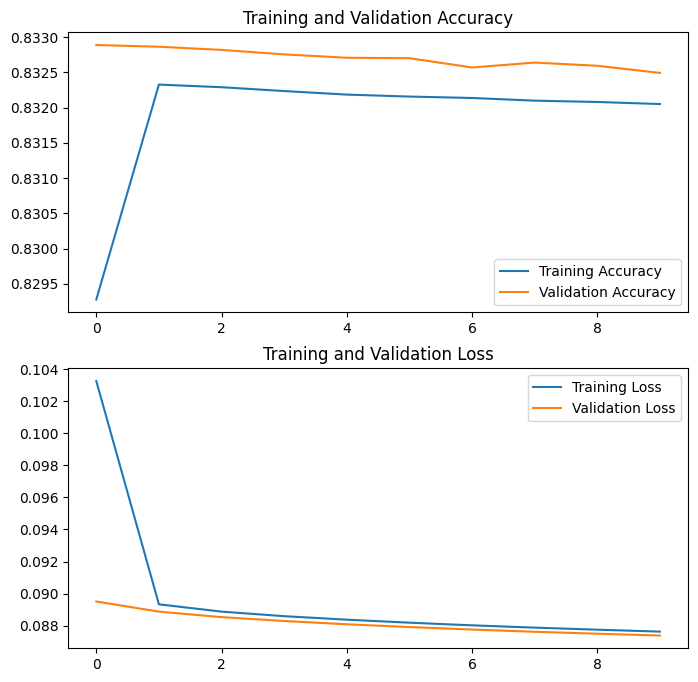

In [ ]:
# defne the input layer with shape (1, 3)-input_shape
inputs1 = keras.layers.Input(shape=input_shape)

# assiged normalization layer as x, receives the input
x1=normalizer(inputs1)

#layer
x1=keras.layers.GRU(64,return_sequences=True,activation='relu')(x1)

outputs1=keras.layers.Dense(3, activation='softmax')(x1)

model_GRU=keras.Model(inputs1, outputs1)
model_GRU.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                   loss='mse',
                   metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_GRU.summary()

callback1 = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

history1 = model_GRU.fit(trainX, trainy, validation_data=(testX, testy),epochs=10, batch_size=64, verbose=1, callbacks=[callback1])

Visualization(history1)


In [ ]:
model_GRU.evaluate(trainX, trainy)

102264/102264 [==============================] - 178s 2ms/step - loss: 0.0876 - accuracy: 0.8320 - precision_1: 0.8322 - recall_1: 0.8316


[0.0875716507434845, 0.8319857120513916, 0.832175076007843, 0.8316459059715271]

In [ ]:
model_GRU.evaluate(testX, testy)

25566/25566 [==============================] - 45s 2ms/step - loss: 0.0874 - accuracy: 0.8325 - precision_1: 0.8327 - recall_1: 0.8322


[0.08738207072019577,
 0.8324923515319824,
 0.8327060341835022,
 0.8321513533592224]

### SimpleRNN Model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 normalization_1 (Normalizat  (None, 1, 3)             7         
 ion)                                                            
                                                                 
 gru_1 (GRU)                 (None, 1, 64)             13248     
                                                                 
 dense_2 (Dense)             (None, 1, 3)              195       
                                                                 
Total params: 13,450
Trainable params: 13,443
Non-trainable params: 7
_________________________________________________________________
Epoch 1/10
51132/51132 [==============================] - 149s 3ms/step - loss: 0.1052 - accuracy: 0.8212 - precision_2: 

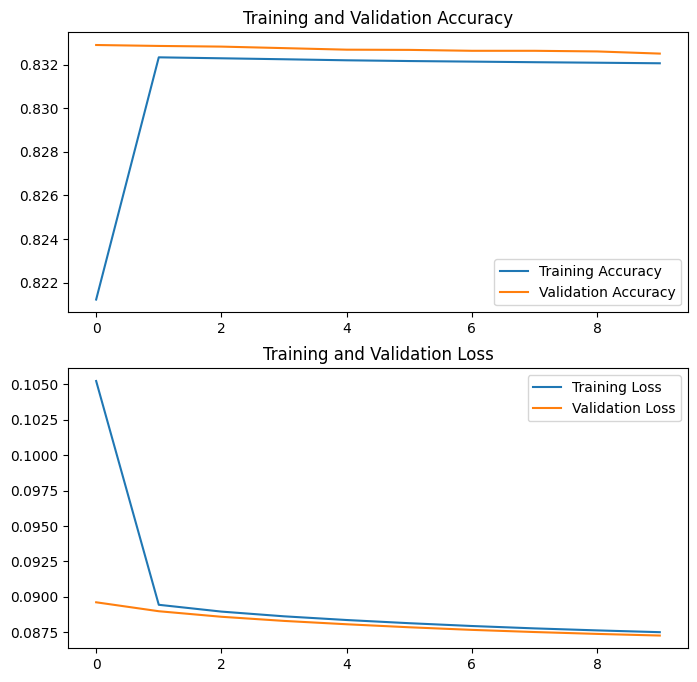

In [ ]:
# defne the input layer with shape (1, 3)-input_shape
inputs2 = keras.layers.Input(shape=input_shape)

# assiged normalization layer as x, receives the input
x2=normalizer(inputs2)

#layer
x2=keras.layers.GRU(64,return_sequences=True,activation='relu')(x2)

outputs2=keras.layers.Dense(3, activation='softmax')(x2)

model_SimpleRNN=keras.Model(inputs2, outputs2)
model_SimpleRNN.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                   loss='mse',
                   metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_SimpleRNN.summary()

callback2 = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

history2 = model_SimpleRNN.fit(trainX, trainy, validation_data=(testX, testy),epochs=10, batch_size=64, verbose=1, callbacks=[callback2])

Visualization(history2)


In [ ]:
model_SimpleRNN.evaluate(trainX, trainy)

102264/102264 [==============================] - 180s 2ms/step - loss: 0.0874 - accuracy: 0.8320 - precision_2: 0.8321 - recall_2: 0.8319


[0.08743750303983688,
 0.8320125937461853,
 0.8320978283882141,
 0.8318570852279663]

In [ ]:
model_SimpleRNN.evaluate(testX, testy)

25566/25566 [==============================] - 45s 2ms/step - loss: 0.0873 - accuracy: 0.8325 - precision_2: 0.8326 - recall_2: 0.8323


[0.08725909143686295,
 0.8324996829032898,
 0.8326141834259033,
 0.8323444724082947]

In [ ]:
# Define the data
data = {
    'Model': ['LSTM', 'GRU', 'SimpleRNN'],
    'Train Loss': [0.08807812631130219, 0.0875716507434845, 0.08743750303983688],
    'Train Accuracy': [0.832033097743988, 0.8319857120513916, 0.8320125937461853],
    'Train Precision': [0.8321433067321777, 0.832175076007843, 0.8320978283882141],
    'Train Recall': [0.8318445086479187, 0.8316459059715271, 0.8318570852279663],
    'Test Accuracy': [0.08788234740495682, 0.08738207072019577, 0.08725909143686295],
    'Test Loss': [0.832553505897522, 0.8324923515319824, 0.8324996829032898],
    'Test Precision': [0.8326954245567322, 0.8327060341835022, 0.8326141834259033],
    'Test Recall': [0.8323554396629333, 0.8321513533592224, 0.8323444724082947]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df

,Model,Train Loss,Train Accuracy,Train Precision,Train Recall,Test Accuracy,Test Loss,Test Precision,Test Recall
0,LSTM,0.088078,0.832033,0.832143,0.831845,0.087882,0.832554,0.832695,0.832355
1,GRU,0.087572,0.831986,0.832175,0.831646,0.087382,0.832492,0.832706,0.832151
2,SimpleRNN,0.087438,0.832013,0.832098,0.831857,0.087259,0.832500,0.832614,0.832344


*   Train Loss: Lower values indicate better performance in minimizing training
error.
*   Train Accuracy: Higher values imply better performance in predicting the training data.
*   Train Precision: Higher values suggest fewer false positives among the positively predicted instances.
*   Train Recall: Higher values indicate fewer false negatives among the actual positive instances.
*   Test Accuracy: Higher values imply better generalization to unseen data.
*   Test Loss: Lower values indicate better performance in minimizing test error.
*   Test Precision: Higher values suggest fewer false positives among the positively predicted instances in the test set.
*   Test Recall: Higher values indicate fewer false negatives among the actual positive instances in the test set.

Based on the provided data:

GRU and SimpleRNN  have the lowest test loss, indicating better performance in generalization compared to LSTM (Model 0).

SimpleRNN has the highest test accuracy and lowest test loss among all models.

GRU has the highest test precision and the highest test recall.

Considering these observations, GRU seems to be performing slightly better overall, especially in terms of test metrics such as accuracy, precision, and recall.

### Hyperparameter Search

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
# Define the model-building function
def build_model(hp):

  # Create the input layer
  inputs = tf.keras.Input(shape=(1, 3))

  # Model
  x = layers.GRU(hp.Int('input_unit',min_value=64,max_value=512,step=64),return_sequences=True)(inputs)

  # outputs
  outputs= layers.Dense(3, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
      loss='mse',
      metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

  return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='model_best',
    project_name='hyperparameter_tuning')

# Define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

# Run the hyperparameter search
tuner.search(
    trainX,
    trainy,
    epochs=10,
    validation_data=(testX, testy),
    callbacks=[ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""

Best number of input unit: {best_hps.get('input_unit')},
Best learning rate: {best_hps.get('learning_rate')}.

""")

# Build the model with the best hyperparameters
final_model= tuner.hypermodel.build(best_hps)

final_model.summary()

# Train the final model
history_hp = final_model.fit(trainX,trainy, epochs=10,  batch_size=64, verbose=1, validation_data=(testX, testy))

Visualization(history_hp)


Trial 22 Complete [00h 35m 25s]
val_accuracy: 0.8327845335006714

Best val_accuracy So Far: 0.8405487537384033
Total elapsed time: 09h 35m 42s

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
256               |384               |input_unit
0.01              |0.01              |learning_rate
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
102264/102264 [==============================] - 642s 6ms/step - loss: 0.0854 - accuracy: 0.8350 - precision: 0.8355 - recall: 0.8342 - val_loss: 0.0839 - val_accuracy: 0.8375 - val_precision: 0.8378 - val_recall: 0.8371
Epoch 2/4
102264/102264 [==============================] - 601s 6ms/step - loss: 0.0840 - accuracy: 0.8376 - precision: 0.8384 - recall: 0.8365 - val_loss: 0.0837 - val_accuracy: 0.8372 - val_precision: 0.8377 - val_recall: 0.8365
E

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 normalization (Normalizatio  (None, 1, 3)             7         
 n)                                                              
                                                                 
 gru_1 (GRU)                 (None, 1, 384)            448128    
                                                                 
 dense_1 (Dense)             (None, 1, 3)              1155      
                                                                 
Total params: 449,290
Trainable params: 449,283
Non-trainable params: 7
_________________________________________________________________
Epoch 1/10
51132/51132 [==============================] - 275s 5ms/step - loss: 0.0847 - accuracy: 0.8362 - precision_1

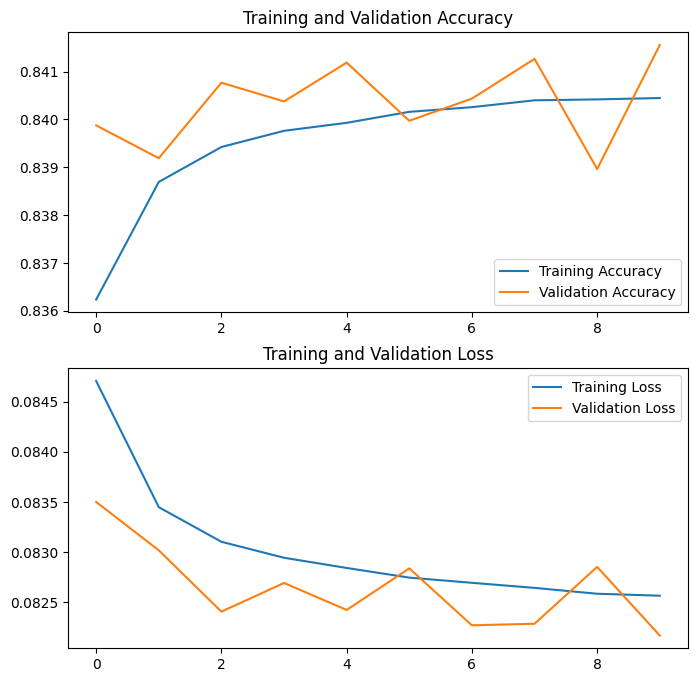

In [ ]:
# defne the input layer with shape (1, 3)-input_shape
inputs1 = keras.layers.Input(shape=input_shape)

# assiged normalization layer as x, receives the input
x1=normalizer(inputs1)

#layer
x1=keras.layers.GRU(384,return_sequences=True,activation='relu')(x1)

outputs1=keras.layers.Dense(3, activation='softmax')(x1)

best_model=keras.Model(inputs1, outputs1)
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                   loss='mse',
                   metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

best_model.summary()

callback1 = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

history1 = best_model.fit(trainX, trainy, validation_data=(testX, testy),epochs=10, batch_size=64, verbose=1, callbacks=[callback1])

Visualization(history1)


In [ ]:
best_model.evaluate(trainX, trainy)

102264/102264 [==============================] - 206s 2ms/step - loss: 0.0823 - accuracy: 0.8414 - precision_1: 0.8424 - recall_1: 0.8401


[0.08234250545501709,
 0.8413833379745483,
 0.8423833847045898,
 0.840091347694397]

In [ ]:
best_model.evaluate(testX, testy)

25566/25566 [==============================] - 52s 2ms/step - loss: 0.0822 - accuracy: 0.8416 - precision_1: 0.8426 - recall_1: 0.8402


[0.08216870576143265,
 0.8415535688400269,
 0.8425915241241455,
 0.8402370810508728]

In [ ]:
train_results=[0.08234250545501709,
 0.8413833379745483,
 0.8423833847045898,
 0.840091347694397]

test_results=[0.08216870576143265,
 0.8415535688400269,
 0.8425915241241455,
 0.8402370810508728]

data = {
    'result': ['Loss', 'Accuracy', 'Precision', 'Recall'],
    'Train': train_results,
    'Test': test_results}

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df

,result,Train,Test
0,Loss,0.082343,0.082169
1,Accuracy,0.841383,0.841554
2,Precision,0.842383,0.842592
3,Recall,0.840091,0.840237


### Classification Report for best model

In [ ]:
print('Best Model - Classification Report')
# Predict classes for the test set
y_pred = best_model.predict(testX)
# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=2).flatten()
# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(testy, axis=2).flatten()
report = classification_report(y_true_labels, y_pred_labels)
print(report)

Best Model - Classification Report
25566/25566 [==============================] - 46s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.98      0.91    681396
           1       0.61      0.16      0.25    116906
           2       0.59      0.01      0.02     19804

    accuracy                           0.84    818106
   macro avg       0.68      0.38      0.39    818106
weighted avg       0.81      0.84      0.80    818106

